# Predictive Maintenance 

This assignment covers the topic of predictive maintenance. Predictive Maintenance problems adress predicting when a machine needs to be maintained ahead of breaking down. This problem can occur anywhere regular maintenance is required for a machine. For example, it can be used in manufacturing, fleet operations, train maintenance, etc.

This assignment will use the [Predictive Maintenance Dataset](https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset). The dataset consists of 10 000 data points stored as rows with 14 features in columns. The 'machine failure' label that indicates, whether the machine has failed in this particular datapoint.

# Learning Objectives
- Perform model tuning based on hyper parameters.
- Select the best model after attempting multiple models.
- Perform recursive feature elimination, producing a statistically significant improvement over a model without feature selection.

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split


ai4i2020 = pd.read_csv('ai4i2020.csv')
print(ai4i2020.info())
ai4i2020.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
UDI                        10000 non-null int64
Product ID                 10000 non-null object
Type                       10000 non-null object
Air temperature [K]        10000 non-null object
Process temperature [K]    10000 non-null object
Rotational speed [rpm]     10000 non-null int64
Torque [Nm]                10000 non-null float64
Tool wear [min]            10000 non-null int64
Machine failure            10000 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 703.2+ KB
None


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0
9,10,M14869,M,298.5,309,1741,28.0,21,0


Question 1.1:  Write a command that will calculate the number of unique values for each feature in the training data.

In [3]:
# Command(s)
for col in ai4i2020:
    print(ai4i2020[col].name, ": ", ai4i2020[col].nunique())

UDI :  10000
Product ID :  10000
Type :  3
Air temperature [K] :  93
Process temperature [K] :  82
Rotational speed [rpm] :  941
Torque [Nm] :  577
Tool wear [min] :  246
Machine failure :  2


Question 1.2: Determine if the data contains any missing values, and replace the values with np.nan. Missing values would be '?'.

In [4]:
# Check if dataframe has any ?
ai4i2020[ai4i2020.eq("?").any(1)]

# Strip white spaces before and after each string in all string columns
for col in ai4i2020:
    if(ai4i2020[col].dtype == object):
        ai4i2020[col] = ai4i2020[col].str.strip()

In [5]:
# Replace ? with np.nan
ai4i2020.replace('?', np.NaN, inplace=True)

In [6]:
# Check if dataframe has np.nan, should be true
ai4i2020.isnull().values.any()

True

Question 1.3: Replace all missing values with the mean. Change column types to numeric.

In [7]:
# Convert from string (object) type to float
ai4i2020["Air temperature [K]"] = ai4i2020["Air temperature [K]"].astype(float)
ai4i2020["Process temperature [K]"] = ai4i2020["Process temperature [K]"].astype(float)

In [8]:
# Replace np.nan with column mean
ai4i2020["Air temperature [K]"].fillna(ai4i2020["Air temperature [K]"].mean(), inplace=True)
ai4i2020["Process temperature [K]"].fillna(ai4i2020["Process temperature [K]"].mean(), inplace=True)

In [9]:
# Check if dataframe has np.nan, should be false
ai4i2020.isnull().values.any()

False

Question 1.4: Drop UDI and 'Product ID' from the data

In [10]:
ai4i2020.drop('UDI', axis=1, inplace=True)
ai4i2020.drop('Product ID', axis=1, inplace=True)
ai4i2020.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


Question 2.1: Split the data into training and testing taking into consideration 'Machine failure' as the target (y)

In [11]:
X = ai4i2020.iloc[:,:-1]
y = ai4i2020.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Question 2.2: Apply [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to data. Make sure to Fit the training data and transform both training and test data. 

In [12]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train)

OneHotEncoder(handle_unknown='ignore')

In [13]:
X_train_ohe = pd.DataFrame(enc.transform(X_train).toarray())
X_test_ohe = pd.DataFrame(enc.transform(X_test).toarray())

Question 2.3: Apply [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) to the training data since there is class imbalance.

In [14]:
# ! pip install --upgrade pip --user
# ! pip install --upgrade imbalanced-learn --user
# ! pip install seaborn --upgrade --user
# Restart kernel

In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_ohe, y_train)

Question 3.1: Train five machine learning [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), and [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier) based on the training data, and evaluate their performance on the test dataset. Use default hyperparameter values.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [17]:
#Build models (You can either do it combined or separate)
models = {'Logistic Regresion': LogisticRegression(), 'Support Vector Machine': SVC(), 'K-NN': KNeighborsClassifier(), 'Decision Tree':DecisionTreeClassifier(),'XGBoost': XGBClassifier()}

In [18]:
# Logistic regression
models['Logistic Regresion'].fit(X_train_res, y_train_res.values.ravel())
y_pred_lr = models['Logistic Regresion'].predict(X_test_ohe)
acc_lr = models['Logistic Regresion'].score(X_test_ohe, y_test)
print("Accuracy: ", acc_lr)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_lr))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_lr, target_names=target_names))

Accuracy:  0.9393939393939394
Confusion matrix:  [[3070  129]
 [  71   30]]
              precision    recall  f1-score   support

     class 0       0.98      0.96      0.97      3199
     class 1       0.19      0.30      0.23       101

    accuracy                           0.94      3300
   macro avg       0.58      0.63      0.60      3300
weighted avg       0.95      0.94      0.95      3300



In [19]:
lr_coef = models['Logistic Regresion'].coef_
lr_intercept = models['Logistic Regresion'].intercept_

In [20]:
# SVC
models['Support Vector Machine'].fit(X_train_res, y_train_res.values.ravel())
y_pred_svc = models['Support Vector Machine'].predict(X_test_ohe)
acc_svc = models['Support Vector Machine'].score(X_test_ohe, y_test)
print("Accuracy: ", acc_svc)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc, target_names=target_names))

Accuracy:  0.9675757575757575
Confusion matrix:  [[3191    8]
 [  99    2]]
              precision    recall  f1-score   support

     class 0       0.97      1.00      0.98      3199
     class 1       0.20      0.02      0.04       101

    accuracy                           0.97      3300
   macro avg       0.58      0.51      0.51      3300
weighted avg       0.95      0.97      0.95      3300



In [21]:
# KNN
models['K-NN'].fit(X_train_res, y_train_res.values.ravel())
y_pred_knn = models['K-NN'].predict(X_test_ohe)
acc_knn = models['K-NN'].score(X_test_ohe, y_test)
print("Accuracy: ", acc_knn)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=target_names))

Accuracy:  0.5236363636363637
Confusion matrix:  [[1658 1541]
 [  31   70]]
              precision    recall  f1-score   support

     class 0       0.98      0.52      0.68      3199
     class 1       0.04      0.69      0.08       101

    accuracy                           0.52      3300
   macro avg       0.51      0.61      0.38      3300
weighted avg       0.95      0.52      0.66      3300



In [22]:
# Decision tree
models['Decision Tree'].fit(X_train_res, y_train_res.values.ravel())
y_pred_dt = models['Decision Tree'].predict(X_test_ohe)
acc_dt = models['Decision Tree'].score(X_test_ohe, y_test)
print("Accuracy: ", acc_dt)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=target_names))

Accuracy:  0.9536363636363636
Confusion matrix:  [[3138   61]
 [  92    9]]
              precision    recall  f1-score   support

     class 0       0.97      0.98      0.98      3199
     class 1       0.13      0.09      0.11       101

    accuracy                           0.95      3300
   macro avg       0.55      0.54      0.54      3300
weighted avg       0.95      0.95      0.95      3300



In [23]:
# XGB
models['XGBoost'].fit(X_train_res, y_train_res.values.ravel())
y_pred_xgb = models['XGBoost'].predict(X_test_ohe)
acc_xgb = models['XGBoost'].score(X_test_ohe, y_test)
print("Accuracy: ", acc_xgb)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=target_names))

Accuracy:  0.9321212121212121
Confusion matrix:  [[3061  138]
 [  86   15]]
              precision    recall  f1-score   support

     class 0       0.97      0.96      0.96      3199
     class 1       0.10      0.15      0.12       101

    accuracy                           0.93      3300
   macro avg       0.54      0.55      0.54      3300
weighted avg       0.95      0.93      0.94      3300



Questions 3.2:  Perform recursive feature elimination (3 features) on the dataset using a logistic regression classifier with max_iter= 1000, random_state=5.  Any difference in the results? Explain.

In [24]:
from sklearn.feature_selection import RFE

estimator = LogisticRegression(max_iter= 1000, random_state=5)
selector = RFE(estimator, n_features_to_select=1815) # 1818 features in total, 1815 after eliminating 3 
selector = selector.fit(X_train_res, y_train_res.values.ravel())

In [25]:
# print(selector.support_)
# print(selector.ranking_)
# X_train_res.columns[selector.support_]

In [26]:
y_pred_rfe_lr = selector.predict(X_test_ohe)
acc_rfe_lr = selector.score(X_test_ohe, y_test)
print("Accuracy: ", acc_rfe_lr)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_rfe_lr))
print(classification_report(y_test, y_pred_rfe_lr, target_names=target_names))

Accuracy:  0.9393939393939394
Confusion matrix:  [[3070  129]
 [  71   30]]
              precision    recall  f1-score   support

     class 0       0.98      0.96      0.97      3199
     class 1       0.19      0.30      0.23       101

    accuracy                           0.94      3300
   macro avg       0.58      0.63      0.60      3300
weighted avg       0.95      0.94      0.95      3300



In [27]:
lr_rfe_coef = selector.estimator_.coef_
lr_rfe_intercept = selector.estimator_.intercept_

In [28]:
# Co-efficient comparison of first 5 features for logistic regression without RFE and with RFE for last iteration
print("Logistic Regression co-efficients. Intercept: ", lr_intercept)
for i in range(0,5):
    print(i, ": ", lr_coef[-1][i])
    
print("Logistic Regression with RFE co-efficients. Intercept: ", lr_rfe_intercept)
for i in range(0,5):
    print(i, ": ", lr_rfe_coef[-1][i])

Logistic Regression co-efficients. Intercept:  [-3.20898707]
0 :  -0.7517238912501732
1 :  0.5329982824036124
2 :  0.21692766380727432
3 :  -0.27697786535270785
4 :  -0.03204550710200951
Logistic Regression with RFE co-efficients. Intercept:  [-3.20890309]
0 :  -0.751775752375468
1 :  0.5328355218990842
2 :  0.21681282482155034
3 :  -0.27693365683845794
4 :  -0.03206307601032872


Comment: There is no difference in performance and coefficients between logistic regression without RFE and logistic regression with RFE. I decreased the number of features to select from 1818 to 1815 to 1750 and the classification report remained the same. This may be because the selector's estimator and l2, the default feature selector are effectively selecting the same features.

One hot encoding only the 'Type' column, using pipeline, scaling, cross validating, hyperparameter tuning and redoing steps from 2.2

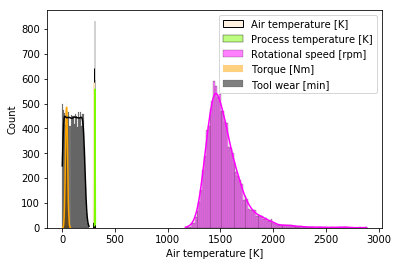

In [29]:
# Distribution graph for the features with numeric values
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

sn.histplot(data=ai4i2020, x="Air temperature [K]", color="bisque", label="Air temperature [K]", kde=True)
sn.histplot(data=ai4i2020, x="Process temperature [K]", color="lawngreen", label="Process temperature [K]", kde=True)
sn.histplot(data=ai4i2020, x="Rotational speed [rpm]", color="fuchsia", label="Rotational speed [rpm]", kde=True)
sn.histplot(data=ai4i2020, x="Torque [Nm]", color="orange", label="Torque [Nm]", kde=True)
sn.histplot(data=ai4i2020, x="Tool wear [min]", color="black", label="Tool wear [min]", kde=True)
plt.legend() 
plt.show()

In [30]:
# Make buckets of features into categorical and numerical
numeric_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_features = ['Type']

In [31]:
# Encoding and scaling in the pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [50]:
# Fit and evaluate the logistic regression
pl_lr = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pl_lr.fit(X_train, y_train.values.ravel())

y_pred_pl_lr = pl_lr.predict(X_test)
acc_pl_lr = pl_lr.score(X_test, y_test)
print("Accuracy: ", acc_pl_lr)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_pl_lr))
print(classification_report(y_test, y_pred_pl_lr, target_names=target_names))

Accuracy:  0.965
Confusion matrix:  [[1918    7]
 [  63   12]]
              precision    recall  f1-score   support

     class 0       0.97      1.00      0.98      1925
     class 1       0.63      0.16      0.26        75

    accuracy                           0.96      2000
   macro avg       0.80      0.58      0.62      2000
weighted avg       0.96      0.96      0.95      2000



In [33]:
# Fit and evaluate the SVC
pl_svc = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC())]
)

pl_svc.fit(X_train, y_train.values.ravel())

y_pred_pl_svc = pl_svc.predict(X_test)
acc_pl_svc = pl_svc.score(X_test, y_test)
print("Accuracy: ", acc_pl_svc)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_pl_svc))
print(classification_report(y_test, y_pred_pl_svc, target_names=target_names))

Accuracy:  0.971
Confusion matrix:  [[1922    3]
 [  55   20]]
              precision    recall  f1-score   support

     class 0       0.97      1.00      0.99      1925
     class 1       0.87      0.27      0.41        75

    accuracy                           0.97      2000
   macro avg       0.92      0.63      0.70      2000
weighted avg       0.97      0.97      0.96      2000



In [34]:
# Fit and evaluate the KNN
pl_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", KNeighborsClassifier())]
)

pl_knn.fit(X_train, y_train.values.ravel())

y_pred_pl_knn = pl_knn.predict(X_test)
acc_pl_knn = pl_knn.score(X_test, y_test)
print("Accuracy: ", acc_pl_knn)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_pl_knn))
print(classification_report(y_test, y_pred_pl_knn, target_names=target_names))

Accuracy:  0.972
Confusion matrix:  [[1922    3]
 [  53   22]]
              precision    recall  f1-score   support

     class 0       0.97      1.00      0.99      1925
     class 1       0.88      0.29      0.44        75

    accuracy                           0.97      2000
   macro avg       0.93      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000



In [35]:
# Fit and evaluate the decision tree
pl_dt = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())]
)

pl_dt.fit(X_train, y_train.values.ravel())

y_pred_pl_dt = pl_dt.predict(X_test)
acc_pl_dt = pl_dt.score(X_test, y_test)
print("Accuracy: ", acc_pl_dt)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_pl_dt))
print(classification_report(y_test, y_pred_pl_dt, target_names=target_names))

Accuracy:  0.9715
Confusion matrix:  [[1891   34]
 [  23   52]]
              precision    recall  f1-score   support

     class 0       0.99      0.98      0.99      1925
     class 1       0.60      0.69      0.65        75

    accuracy                           0.97      2000
   macro avg       0.80      0.84      0.82      2000
weighted avg       0.97      0.97      0.97      2000



In [36]:
# Fit and evaluate the XGB
pl_xgb = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", XGBClassifier())]
)

pl_xgb.fit(X_train, y_train.values.ravel())

y_pred_pl_xgb = pl_xgb.predict(X_test)
acc_pl_xgb = pl_xgb.score(X_test, y_test)
print("Accuracy: ", acc_pl_xgb)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_pl_xgb))
print(classification_report(y_test, y_pred_pl_xgb, target_names=target_names))

Accuracy:  0.982
Confusion matrix:  [[1920    5]
 [  31   44]]
              precision    recall  f1-score   support

     class 0       0.98      1.00      0.99      1925
     class 1       0.90      0.59      0.71        75

    accuracy                           0.98      2000
   macro avg       0.94      0.79      0.85      2000
weighted avg       0.98      0.98      0.98      2000



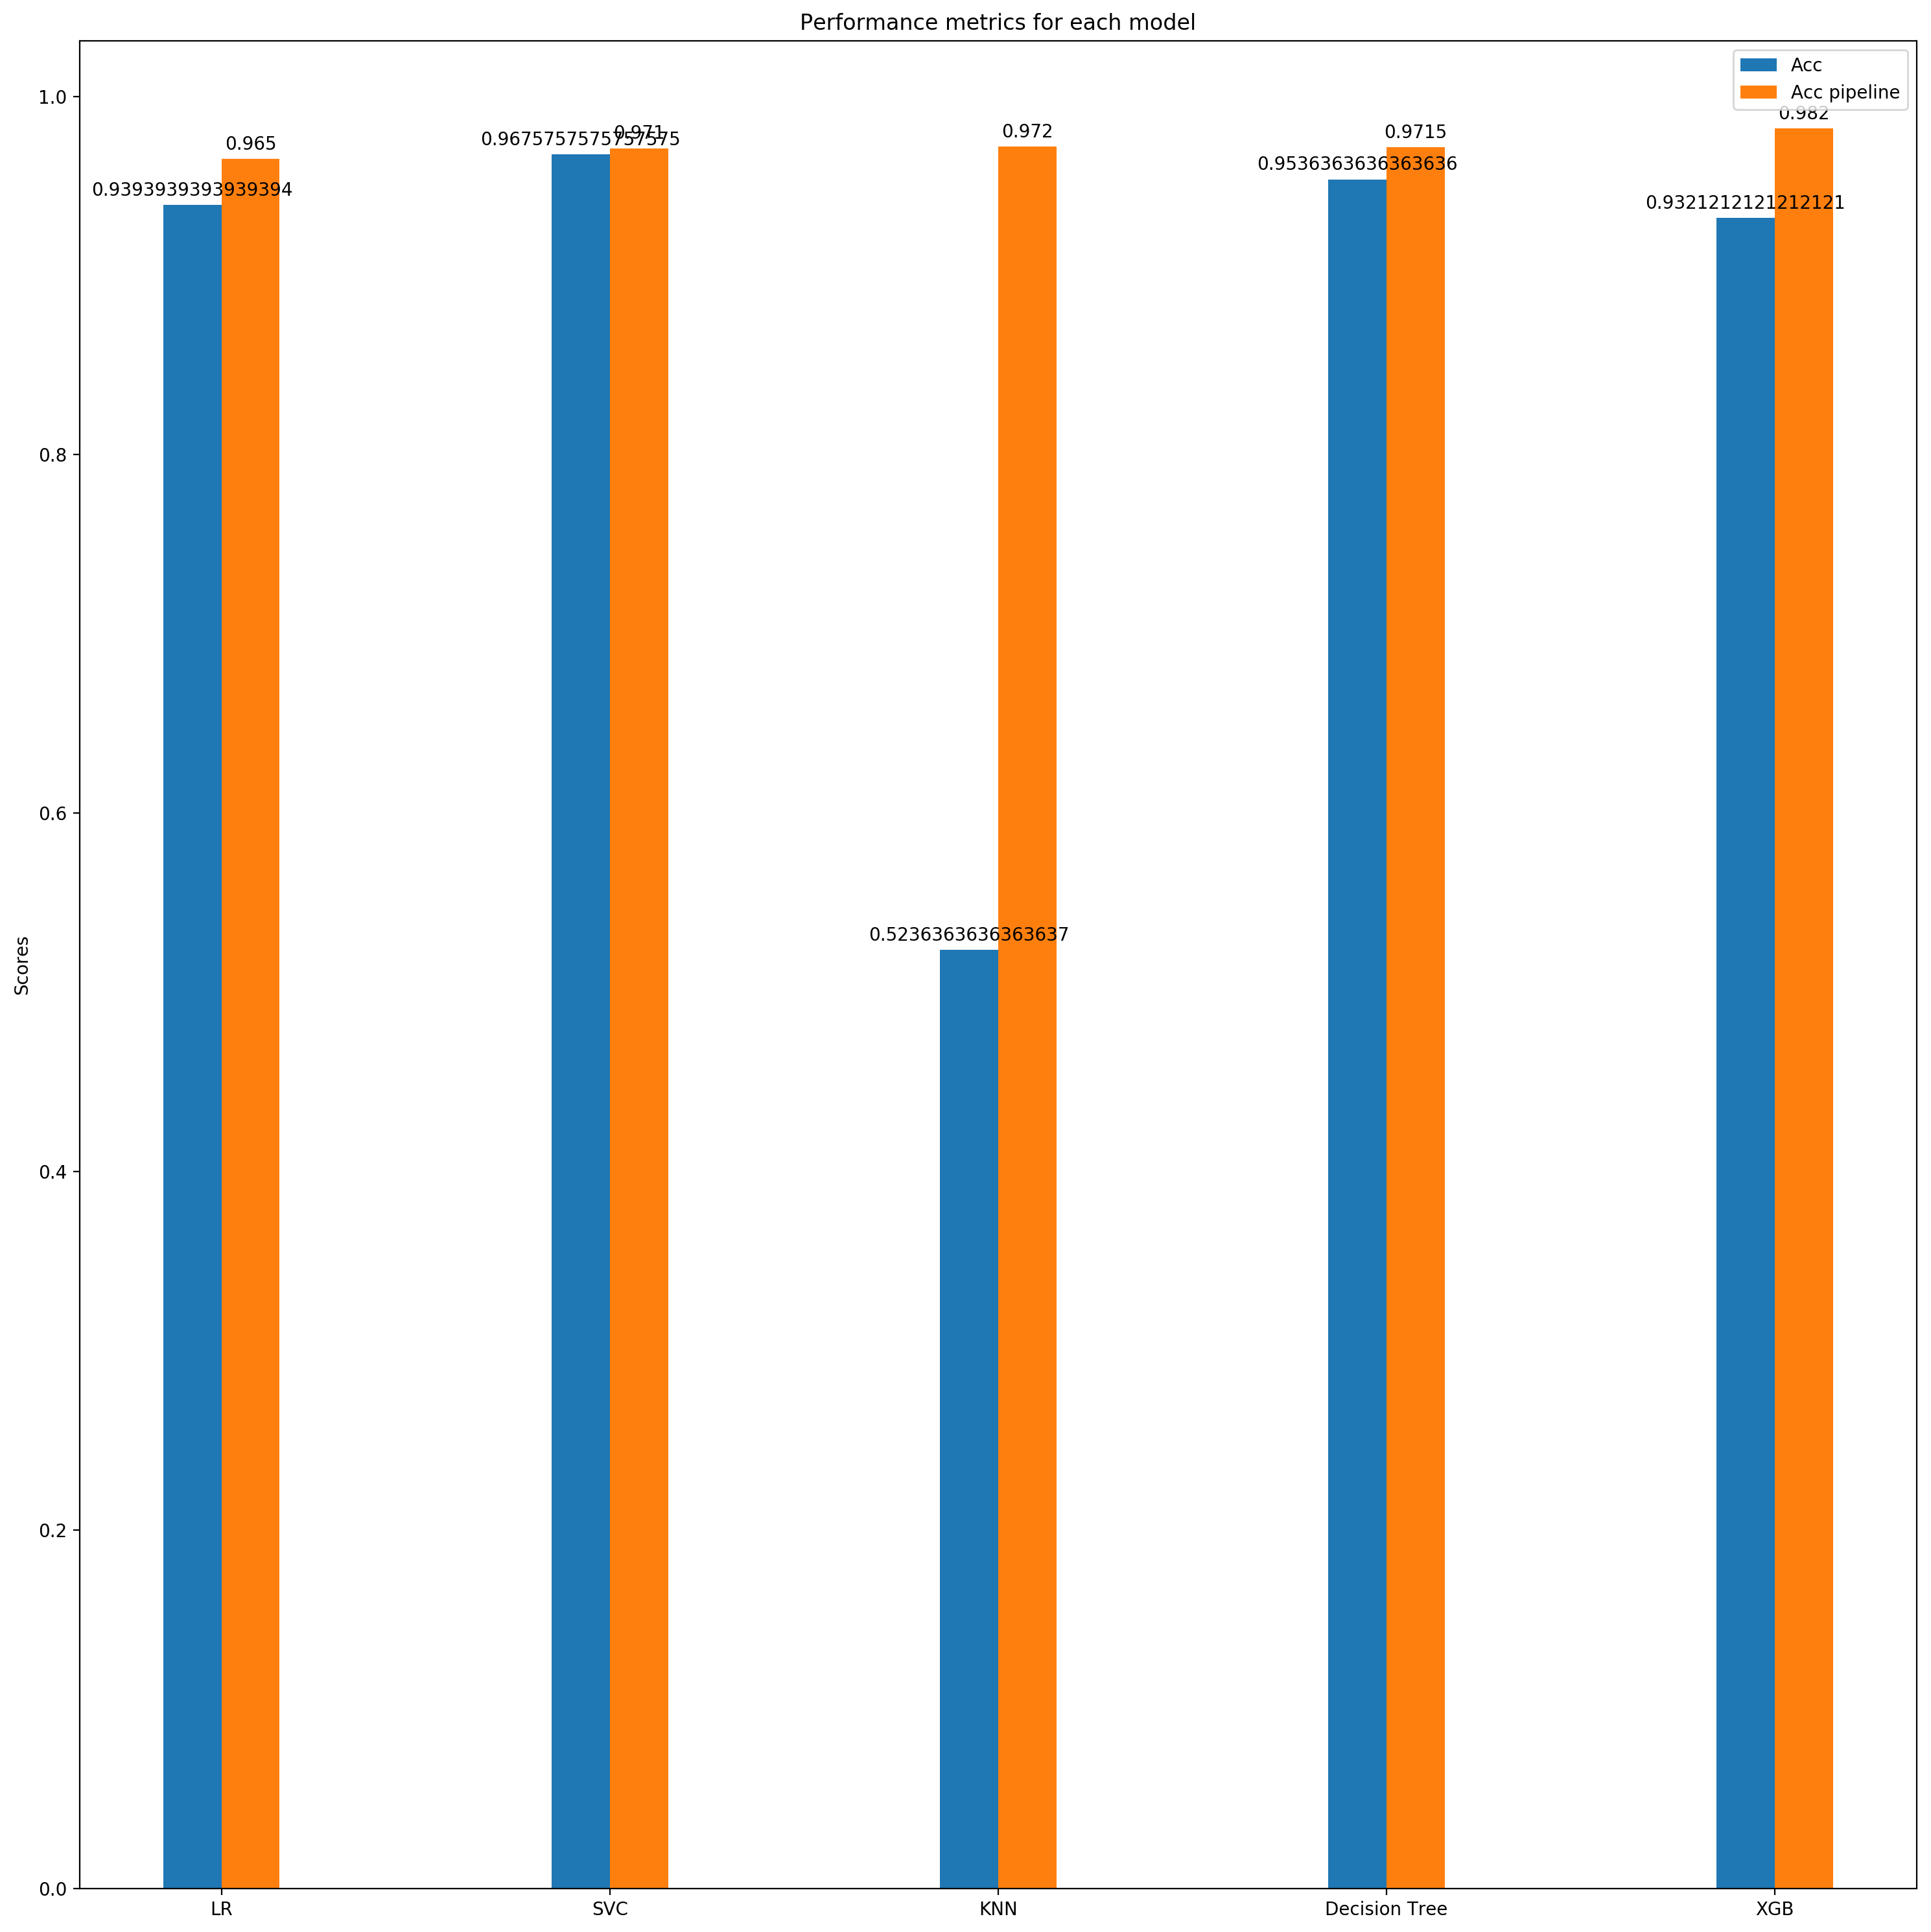

In [37]:
# Compare performance
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] = 200

models = ("LR", "SVC", "KNN", "Decision Tree", "XGB")
accuracy1 = [acc_lr, acc_svc, acc_knn, acc_dt, acc_xgb]
accuracy2 = [acc_pl_lr, acc_pl_svc, acc_pl_knn, acc_pl_dt, acc_pl_xgb]

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy1, width, label='Acc')
rects2 = ax.bar(x + width/2, accuracy2, width, label='Acc pipeline')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance metrics for each model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [58]:
# Hyperparameter tuning on logistic regression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

ai4i2020_df = ai4i2020.copy()
ai4i2020_df = pd.get_dummies(ai4i2020_df, columns=['Type'], prefix='Type')
ai4i2020_df.head()

logistic = LogisticRegression(random_state=0)

X =  ai4i2020_df[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Type_H", "Type_L", "Type_M"]]
y = ai4i2020_df[["Machine failure"]]

params = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'none'])
clf = RandomizedSearchCV(logistic, params, random_state=0)
search = clf.fit(X, y.values.ravel())
search.best_params_

/mnt/vocwork5/ccc_v1_w_MTM3N_80465/asn1392908_5/asn1392909_1/work/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/mnt/vocwork5/ccc_v1_w_MTM3N_80465/asn1392908_5/asn1392909_1/work/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/mnt/vocwork5/ccc_v1_w_MTM3N_80465/asn1392908_5/asn1392909_1/work/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/mnt/vocwork5/ccc_v1_w_MTM3N_80465/asn1392908_5/asn1392909_1/work/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1323: UserWarning: Setting pena

/mnt/vocwork5/ccc_v1_w_MTM3N_80465/asn1392908_5/asn1392909_1/work/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/mnt/vocwork5/ccc_v1_w_MTM3N_80465/asn1392908_5/asn1392909_1/work/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/mnt/vocwork5/ccc_v1_w_MTM3N_80465/asn1392908_5/asn1392909_1/work/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/mnt/vocwork5/ccc_v1_w_MTM3N_80465/asn1392908_5/asn1392909_1/work/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1323: UserWarning: Setting pena

{'C': 0.22685190926977272, 'penalty': 'l2'}

In [39]:
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

print("Cross value score: ", cross_val_score(pl_dt, X_train, y_train, cv=3))

cv_results = cross_validate(pl_dt, X_train, y_train, cv=3)
cv_results['test_score']

Cross value score:  [0.97750281 0.98012748 0.97861965]


array([0.97750281, 0.97712786, 0.97711928])

Q.4. Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include:
What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work. 

I came in with no experience apart from the previous assignments w.r.t regression and penalties. I was initially surprised by the suggestion of one hot encoding the entire dataset which means for columns like rotational speed which has 941 unique values, it would add 941 more columns. It doesn't really make sense to me to one hot encode all the columns, the data is unreadable. But through the process of this and the previous assignments, I've come to understand how to approach and treat the data for a machine learning problem. There is one one shoe fits all solution and it all depends on the data. Exploring data is key. When would normalization help? It always helps to scale data. It always helps to cross validate and hypertune the parameters to check for the best model. Helps to perform feature selection and check for feature combinations. Metrics such as p-values, F1 scores, R-squared, accuracy, confusion matrix help gauge the direction in which I'm going (am I choosing the right model? etc). Commenting on this particular assignment, I was surprised by how much better the models performed after scaling, especially KNN. 